In [36]:
#Importing all the libraries that may be required

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import difflib
import warnings
warnings.filterwarnings("ignore")

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Copying the file path and loading the file in 'movies_data' variable

file_path = '/content/netflix_titles.csv'
movies_data = pd.read_csv(file_path)

In [3]:
#Creating a copy of the original dataset in 'df' for further use so that the original data is not altered

df = movies_data.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#Checking the dimensions of the dataset

print("Total Rows: ", df.shape[0])
print("Total Columns: ", df.shape[1])

Total Rows:  8807
Total Columns:  12


In [5]:
#Checking the data type of each column in the dataset

print("Data types of columns:\n", df.dtypes)

Data types of columns:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [6]:
#Converting the data type of 'release_year' to object type for uniformitiy

df['release_year'] = df['release_year'].astype('object')

In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#Handling missing data

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')  # Imputer instance with most frequent strategy
df['duration'] = imp.fit_transform(df[['duration']])  # Imputing missing values in 'director' column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# Display the 'duration' feature

print("Duration of shows:\n", df.duration.head())

Duration of shows:
 0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object


In [10]:
# Extract unique units in the 'duration' feature

unique_durations = set([x[1] for x in list(df.duration.str.split())])
print("Unique durations:", unique_durations)

Unique durations: {'Seasons', 'min', 'Season'}


In [11]:
# Define a function to convert duration to minutes

def converting_to_minutes(duration):
    if "Season" in duration:
        num_seasons = int(duration.split()[0])
        return num_seasons * 400
    else:
        return int(duration.split()[0])

In [12]:
# Apply the function to the 'duration' column

df['duration'] = df['duration'].apply(converting_to_minutes)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,800,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,400,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,400,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,800,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
#Converting the data type of 'duration' to object type for uniformitiy

df['duration'] = df['duration'].astype('object')
print("Data types of columns:\n", df.dtypes)

Data types of columns:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year    object
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [14]:
df['cast'].fillna('',inplace=True)
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast               0
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

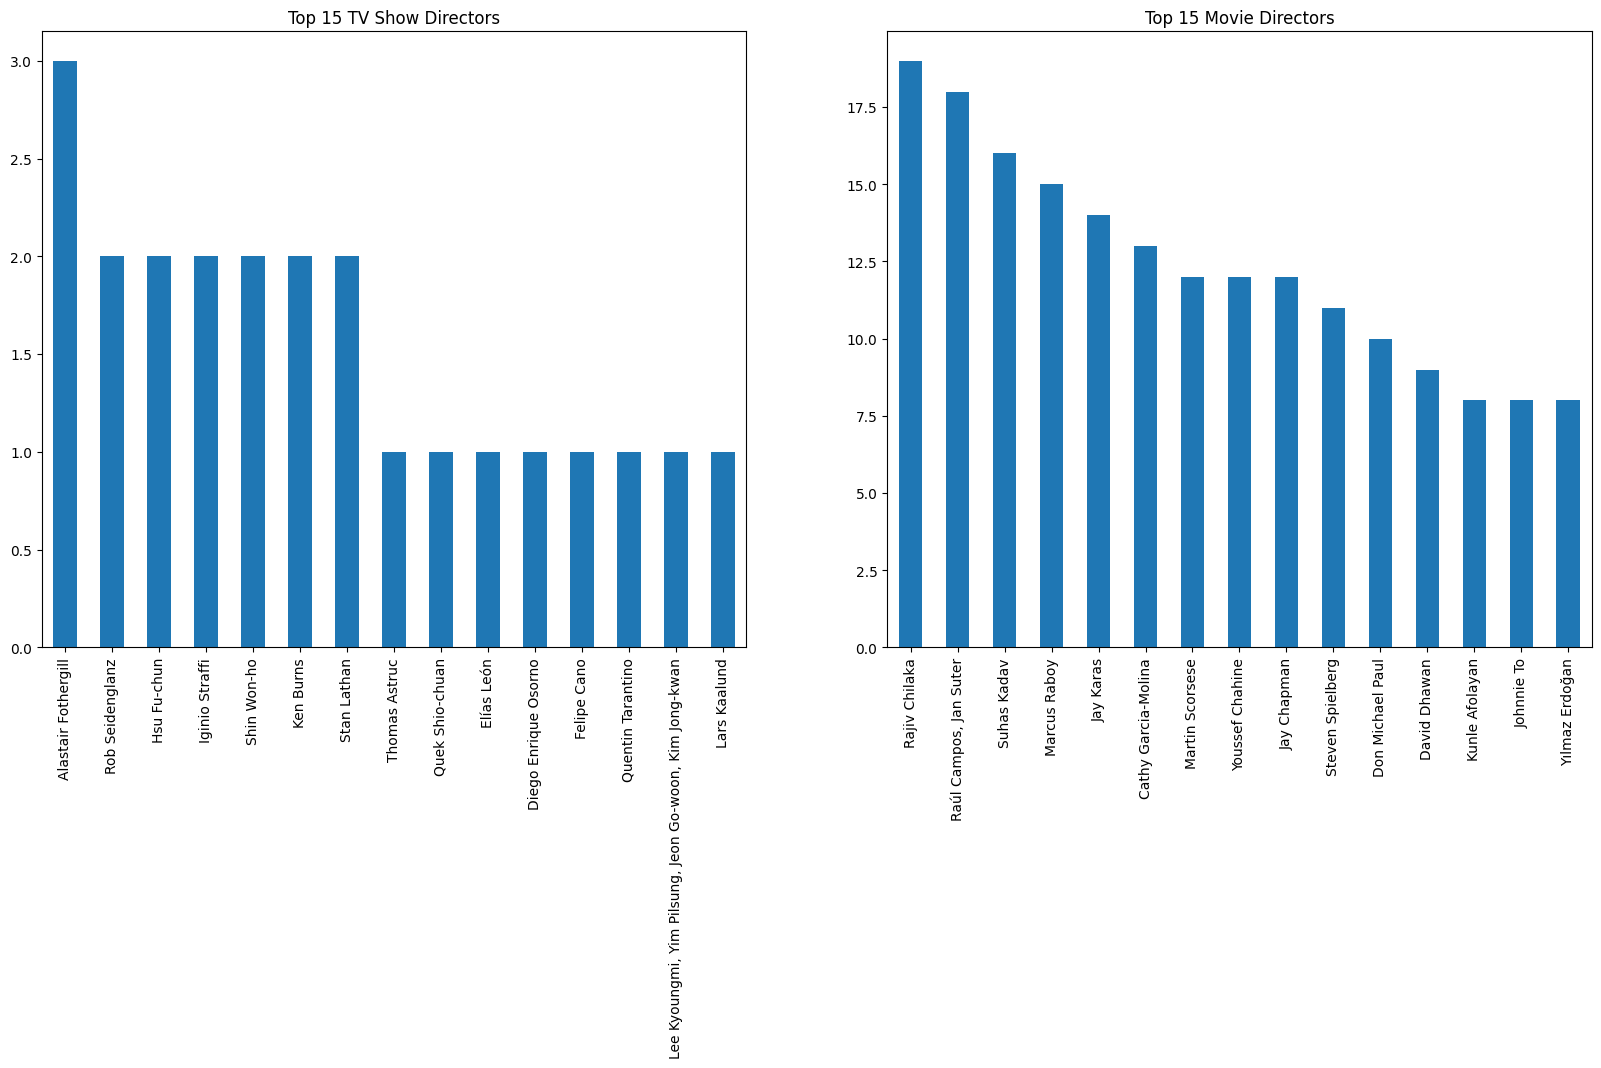

In [15]:
# Chart - 1 visualization code
# The first value will be '' that we used to deal with misiing values,
# so we will ignore that and plot for the rest 15 values

tv_show = df[df.type == 'TV Show']
movie = df[df.type == 'Movie']

fig, (ax1, ax2) = plt.subplots(1,2)
tv_show.director.value_counts()[:15].plot(kind='bar',ax = ax1,title='Top 15 TV Show Directors',figsize = (20,8))
movie.director.value_counts()[:15].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Directors',figsize = (20,8))
plt.show()

In [16]:
tv_show['cast'][1].split(',')

['Ama Qamata',
 ' Khosi Ngema',
 ' Gail Mabalane',
 ' Thabang Molaba',
 ' Dillon Windvogel',
 ' Natasha Thahane',
 ' Arno Greeff',
 ' Xolile Tshabalala',
 ' Getmore Sithole',
 ' Cindy Mahlangu',
 ' Ryle De Morny',
 ' Greteli Fincham',
 ' Sello Maake Ka-Ncube',
 ' Odwa Gwanya',
 ' Mekaila Mathys',
 ' Sandi Schultz',
 ' Duane Williams',
 ' Shamilla Miller',
 ' Patrick Mofokeng']

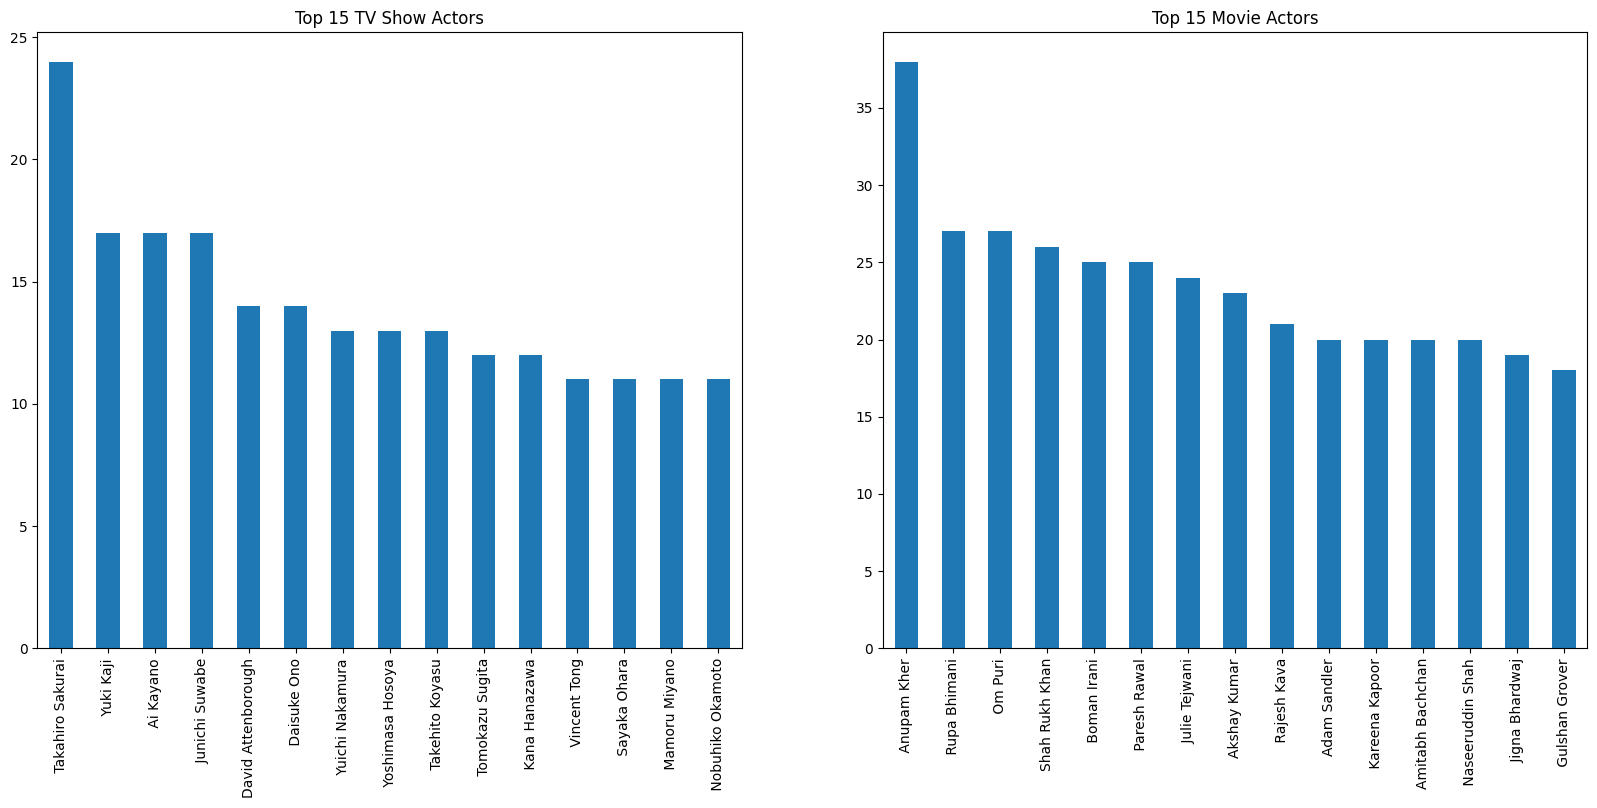

In [17]:
# Chart - 2 visualization code
tv_show_cst = []
for obs in tv_show.iterrows():
    tv_show_cst.extend(obs[1]['cast'].split(','))

movie_cst = []
for obs in movie.iterrows():
    movie_cst.extend(obs[1]['cast'].split(','))


fig, (ax1, ax2) = plt.subplots(1,2)
pd.Series(tv_show_cst).value_counts()[1:16].plot(kind='bar',ax = ax1,title='Top 15 TV Show Actors',figsize = (20,8))
pd.Series(movie_cst).value_counts()[1:16].plot(kind='bar',ax =ax2, title = 'Top 15 Movie Actors',figsize = (20,8))
plt.show()


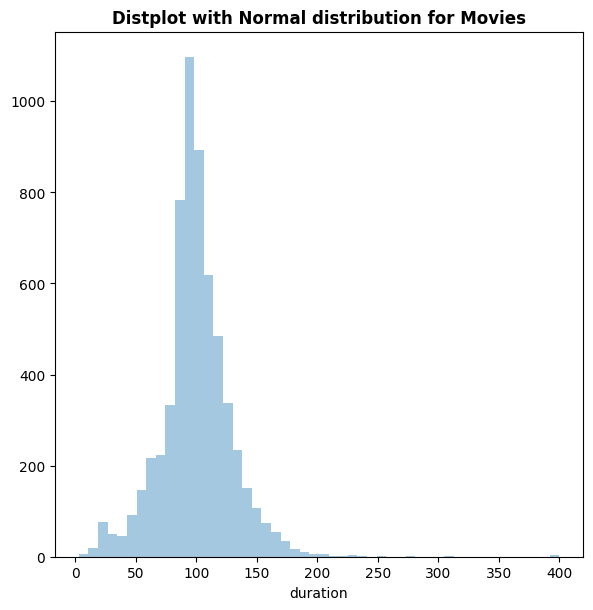

In [18]:
# Chart - 3 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.distplot(movie['duration'].astype('int'),kde=False)
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

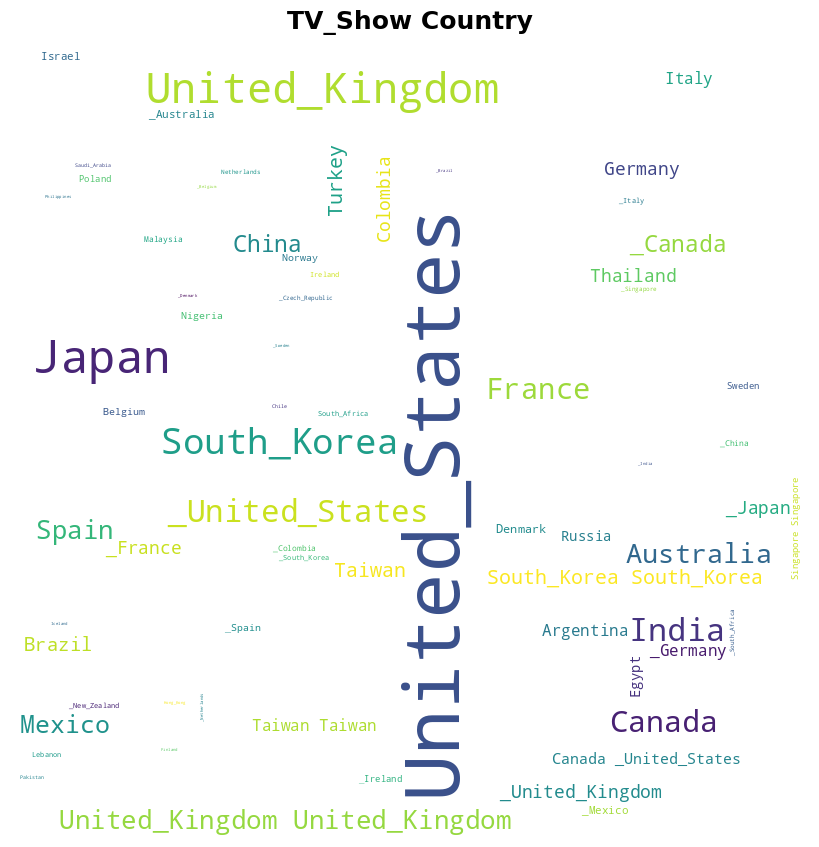

In [19]:
# Chart - 4 visualization code
from wordcloud import WordCloud, STOPWORDS

#Checking the distribution of TV SHOWS
df_word_cloud = tv_show['country'].dropna()
text = " ".join([word.strip().replace(' ','_') for word in df_word_cloud])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('TV_Show Country', fontsize=18, fontweight='bold')
plt.show()

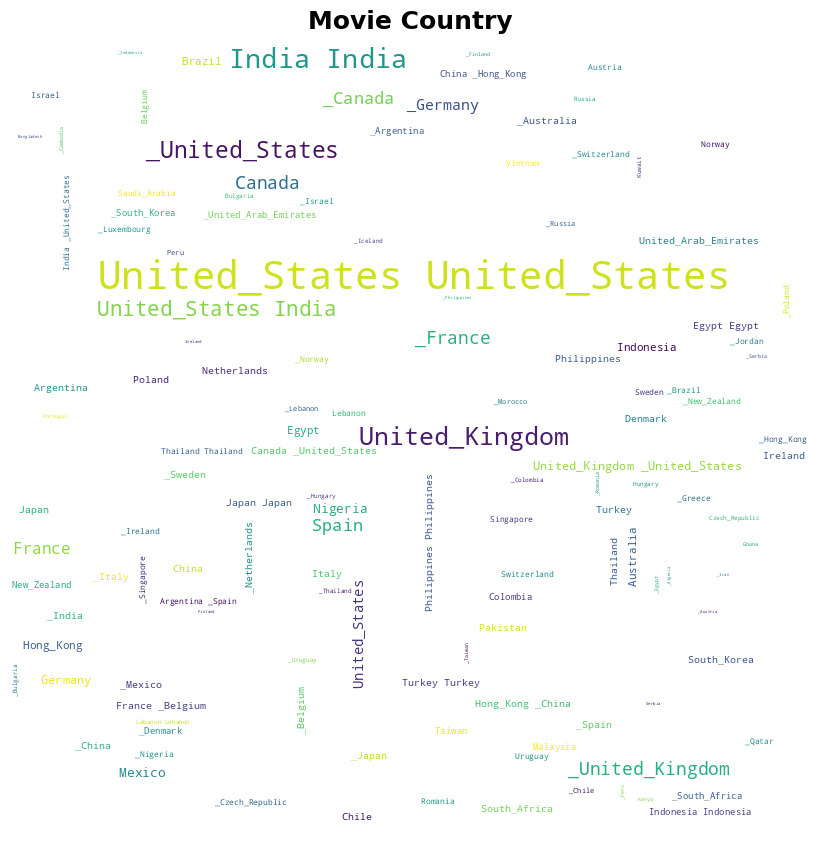

In [20]:
#Checking the distribution of Movies
df_word_cloud = movie['country'].dropna()
text = " ".join([word.strip().replace(' ','_') for word in df_word_cloud])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Movie Country', fontsize=18, fontweight='bold')
plt.show()

In [21]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast               0
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [22]:
df['country'].fillna('',inplace=True)
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast               0
country            0
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

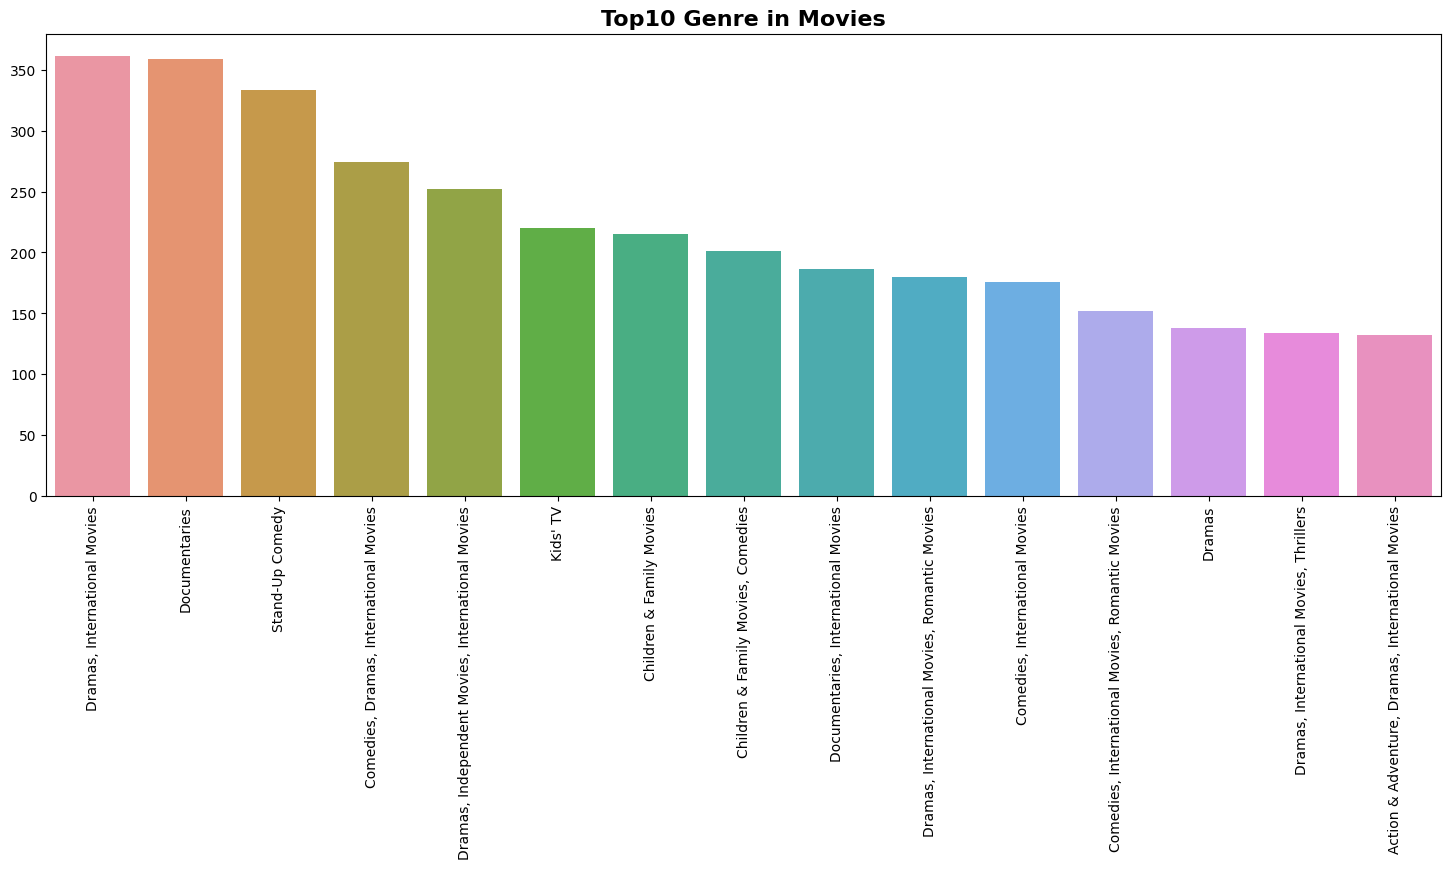

In [23]:
# Chart - 5 visualization code

# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values)
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

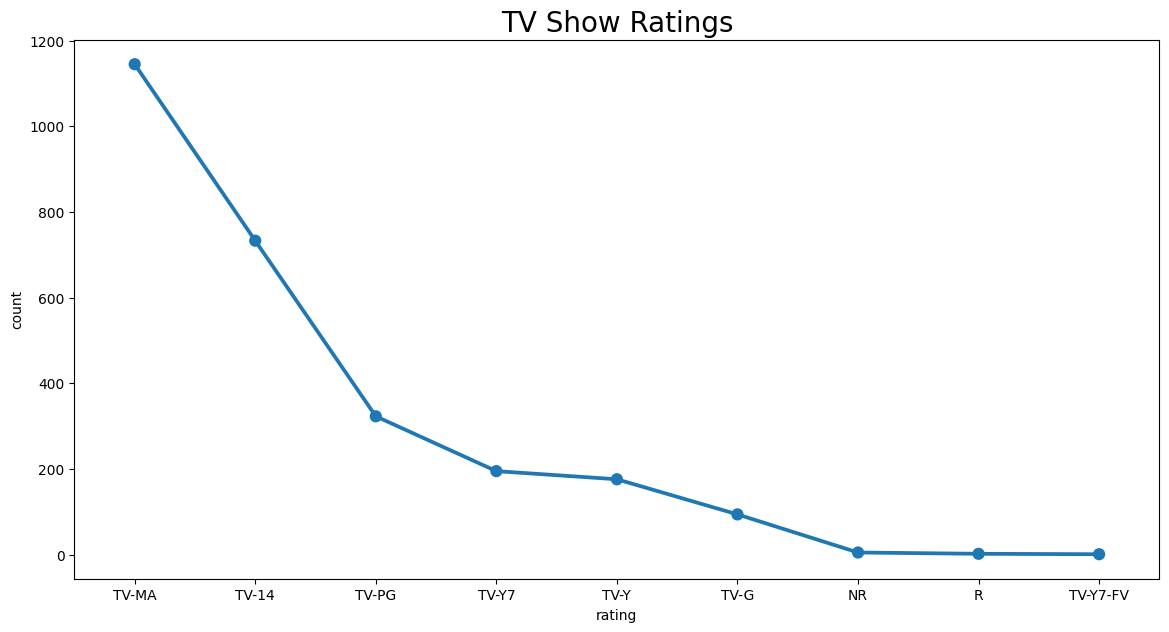

In [24]:
# Chart - 7 visualization code
#Rating based on rating system of all TV Shows

tv_ratings = tv_show.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

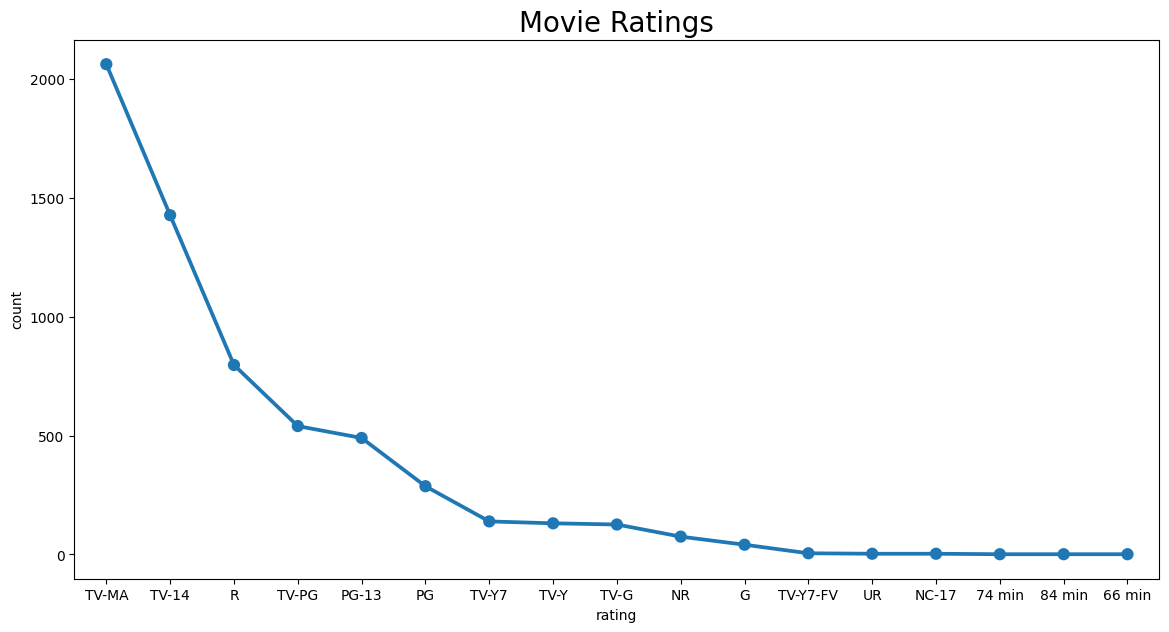

In [25]:
#Rating based on rating system of all TV Shows

movie_ratings = movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Movie Ratings',size='20')
plt.show()

In [26]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

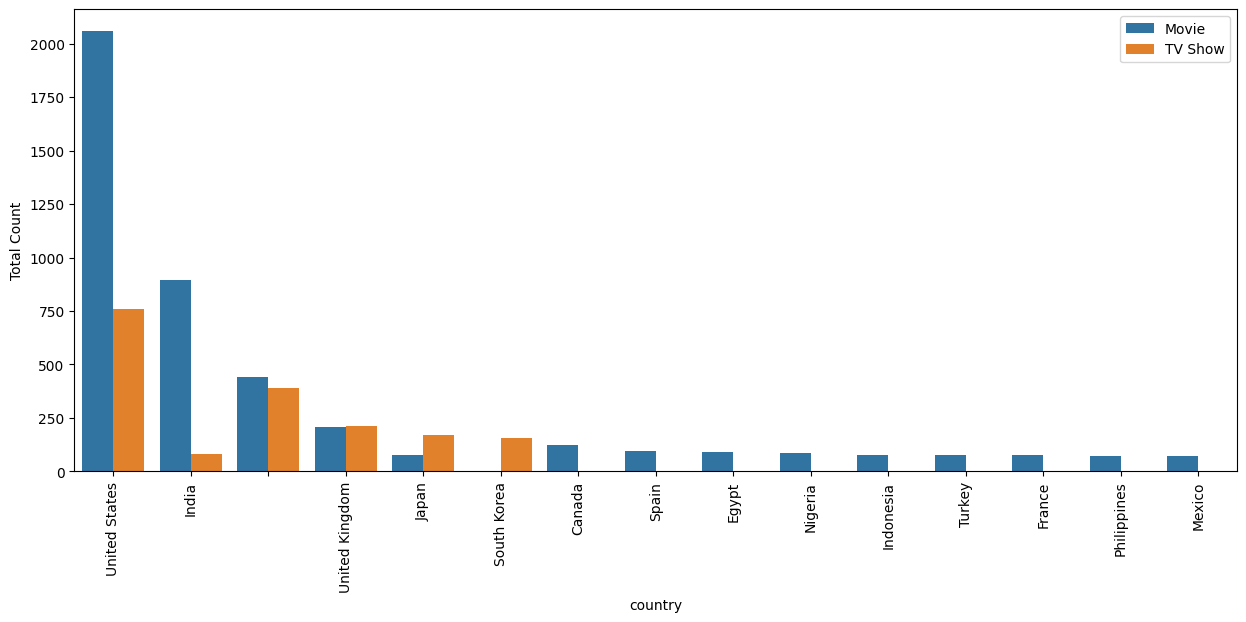

In [27]:
## Chart - 8 visualization code
# Count of TVshow and Movie produced in different country

df_country = df.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
plt.figure(figsize = (15, 6))
sns.barplot(data = df_country, x = df_country['country'][:20], y = df_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.ylabel('Total Count')
plt.show()

In [28]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
# Getting rid of all the missing values

df.fillna('',inplace=True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [30]:
# Converting the datqa type of all columns to string for concatenation

for temp in df.columns:
  df[temp] = df[temp].astype('string')
df.dtypes

show_id         string
type            string
title           string
director        string
cast            string
country         string
date_added      string
release_year    string
rating          string
duration        string
listed_in       string
description     string
dtype: object

In [31]:
# Concatenating all the columns into one single variable for convenience of use

x = df['type']+' '+df['director']+' '+df['cast']+' '+df['country']+' '+df['release_year']+' '+df['rating']+' '+df['duration']+' '+df['listed_in']+' '+df['description']

title = df['title']
print(x.head())
print('\n')
print(title.head())

0    Movie Kirsten Johnson  United States 2020 PG-1...
1    TV Show  Ama Qamata, Khosi Ngema, Gail Mabalan...
2    TV Show Julien Leclercq Sami Bouajila, Tracy G...
3    TV Show    2021 TV-MA 400 Docuseries, Reality ...
4    TV Show  Mayur More, Jitendra Kumar, Ranjan Ra...
dtype: string


0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: string


In [32]:
x[0]

'Movie Kirsten Johnson  United States 2020 PG-13 90 Documentaries As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [33]:
# Text Preprocessing

def text_preprocessing(text):
    text = text.lower()                    # Convert text to lowercase
    text = nltk.word_tokenize(text)        # Tokenize text into words
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)                    # Removing non-alphanumeric characters
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)                   # Removing stopwords and punctuation
    text = y[:]
    y.clear()
    stemmer = SnowballStemmer('english')  # Initializing SnowballStemmer for stemming words
    for i in text:
        y.append(stemmer.stem(i))         # Applying stemming to words
    return " ".join(y)                    # Joining processed words back into text


In [34]:
x = x.apply(text_preprocessing)
x.head()

0    movi kirsten johnson unit state 2020 90 docume...
1    tv show ama qamata khosi ngema gail mabalan th...
2    tv show julien leclercq sami bouajila traci go...
3    tv show 2021 400 docuseri realiti tv feud flir...
4    tv show mayur jitendra kumar ranjan raj alam k...
dtype: object

In [35]:
x[0]

'movi kirsten johnson unit state 2020 90 documentari father near end life filmmak kirsten johnson stage death invent comic way help face inevit'

In [50]:
vectorizer = TfidfVectorizer(min_df = 0.004)   # min_df set to 0.004, that is each feature must appear in at least around 35 of the movies
matrix= vectorizer.fit_transform(x).toarray()  # for it to be considered an important and relevant feature
print(matrix)
matrix.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(8807, 1348)

In [51]:
similarity = cosine_similarity(matrix)   # Each entry (movie) is compared to every other entry for similarity, so the similarity matrix that we get
print(similarity)                        # is a (n x n) matrix where n is the number of entries
similarity.shape

[[1.         0.         0.         ... 0.0203836  0.04399644 0.10130334]
 [0.         1.         0.21168609 ... 0.04586684 0.         0.01358394]
 [0.         0.21168609 1.         ... 0.03548383 0.01510372 0.02219787]
 ...
 [0.0203836  0.04586684 0.03548383 ... 1.         0.08367564 0.01420982]
 [0.04399644 0.         0.01510372 ... 0.08367564 1.         0.03056658]
 [0.10130334 0.01358394 0.02219787 ... 0.01420982 0.03056658 1.        ]]


(8807, 8807)

In [52]:
title = title.tolist()
len(title)                # Number of entries

8807

In [67]:
df['title'].sample(30)

216                                 Shor In the City
4899                                       Sometimes
5329                     Chocolate City: Vegas Strip
2387                                    4th Republic
7404                                 Marching Orders
6881                                            Gook
3041                                   Bulletproof 2
8413                               The Mask of Zorro
8184                        The Adventures of Tintin
4161                     Surga Yang Tak Dirindukan 2
3360                               Tomorrow with You
6569                                           Darra
270                                          Beckett
6686                                    Elstree 1976
4723                                            Fiza
1215                                 Romantik Komedi
241                                         Manifest
7434    Meet the Trumps: From Immigrant to President
4569                        Harishchandrachi F

In [68]:
movie_name= input('Enter your favourite movie name:')
movie_name

Enter your favourite movie name:Paranormal Activity


'Paranormal Activity'

In [69]:
# Getting close movie title matches for input movie name

close_matches= difflib.get_close_matches(movie_name, title)
close_matches

['Paranormal Activity', 'Paranormal', 'Paranormal Survivor']

In [84]:
def recommender(close,similarity):
  close_index= df[df['title']==close].index.values[0]
  similarity_score = list(enumerate(similarity[close_index])) # Getting the entry corresponding to close movie name in similarity matrix
  sorted_similar_movies = sorted(similarity_score,key= lambda x:x[1], reverse = True) # Sorting similarity values in descending values
  print('Movies suggested for you : \n') # Displaying suggested movies
  i = 1
  for x in sorted_similar_movies:
      index= x[0]
      title = df.iloc[df.index == index]['title'].values[0]
      if (i<10):
          print(i, '.',title)
          i+=1


In [86]:
recommender(close_matches[0],similarity)

Movies suggested for you : 

1 . Paranormal Activity
2 . Gender Revolution: A Journey with Katie Couric
3 . Twinsanity
4 . A Perfect Man
5 . Game Over (Hindi Version)
6 . Game Over (Telugu Version)
7 . The Open House
8 . Straight Up
9 . Game Over (Tamil Version)


In [87]:
recommender(close_matches[1],similarity)

Movies suggested for you : 

1 . Paranormal
2 . More to Say
3 . Valentino
4 . My Way
5 . El desconocido
6 . Abla Fahita: Drama Queen
7 . Eugenie Nights
8 . الف مبروك
9 . The Dealer


In [88]:
recommender(close_matches[2],similarity)

Movies suggested for you : 

1 . Paranormal Survivor
2 . Hunters of the South Seas
3 . Hyper HardBoiled Gourmet Report
4 . Kingdoms of the Sky
5 . Hip-Hop Evolution
6 . Drug Lords
7 . Chasing Monsters
8 . Captive
9 . The Break with Michelle Wolf
